<a href="https://colab.research.google.com/github/mridulhalder/Springboard/blob/main/FirstColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

# 1. Load the yellow_tripdata_2022-01.parquet file into Pandas
df = pd.read_parquet('/content/yellow_tripdata_2022-01.parquet')

# 2. Print the first 5 rows of data
print(df.head())

Saving yellow_tripdata_2022-01.parquet to yellow_tripdata_2022-01.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   



In [7]:
print("\nSchema (columns):")
print(df.columns)
print("\nData types:")
print(df.dtypes)


Schema (columns):
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

Data types:
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount            

In [8]:
# How many rows and unique columns?
print(f"\nNumber of rows: {len(df)}")
print(f"Number of unique columns: {df.shape[1]}")


Number of rows: 2463931
Number of unique columns: 19


In [9]:
# Which columns have NULL values and how many?
print("\nNULL values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])


NULL values per column:
passenger_count         71503
RatecodeID              71503
store_and_fwd_flag      71503
congestion_surcharge    71503
airport_fee             71503
dtype: int64


In [10]:
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   2.463931e+06                     2463931                     2463931   
unique           NaN                         NaN                         NaN   
top              NaN                         NaN                         NaN   
freq             NaN                         NaN                         NaN   
mean    1.707819e+00  2022-01-17 01:19:51.689724  2022-01-17 01:34:04.421902   
min     1.000000e+00         2008-12-31 22:23:09         2008-12-31 23:06:56   
25%     1.000000e+00         2022-01-09 15:37:41  2022-01-09 15:50:50.500000   
50%     2.000000e+00         2022-01-17 12:11:45         2022-01-17 12:23:49   
75%     2.000000e+00  2022-01-24 13:49:37.500000         2022-01-24 14:02:51   
max     6.000000e+00         2022-05-18 20:41:57         2022-05-18 20:47:45   
std     5.021375e-01                         NaN                         NaN   

        passenger_

In [11]:
# Example: Check for negative fare amounts
anomalies = df[df['fare_amount'] < 0]
print(f"\nNumber of trips with negative fare_amount: {len(anomalies)}")
if len(anomalies) > 0:
    print(anomalies[['fare_amount']].head())


Number of trips with negative fare_amount: 12733
     fare_amount
154        -21.0
521        -17.0
523        -75.0
580         -4.0
714        -12.0


In [12]:
# Drop all rows with NULL values and store the result
df_clean = df.dropna()
print(f"\nShape after dropping NULLs: {df_clean.shape}")


Shape after dropping NULLs: (2392428, 19)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('/content/yellow_tripdata_2022-01.parquet')

# 1. Create a new feature that calculates the trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [7]:
# Create features for pick-up day of week and pick-up hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

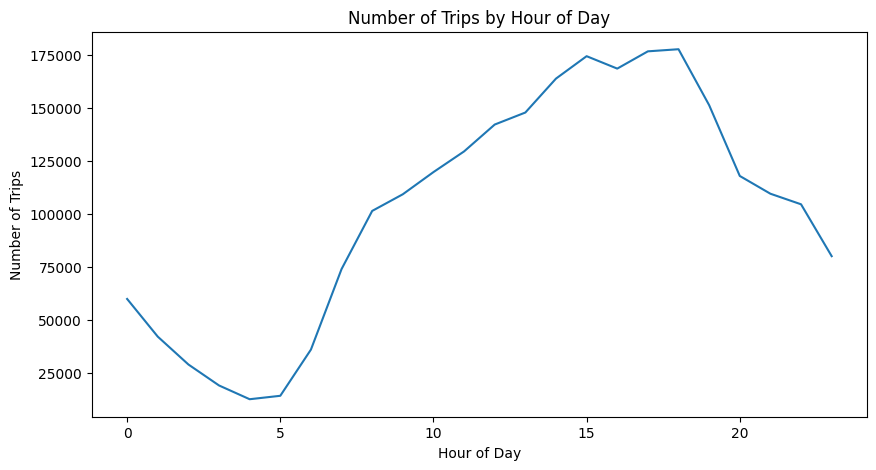

In [8]:
# Line plot: number of trips as a function of hour of day
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=df['pickup_hour'].value_counts().sort_index().index,
    y=df['pickup_hour'].value_counts().sort_index().values
)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

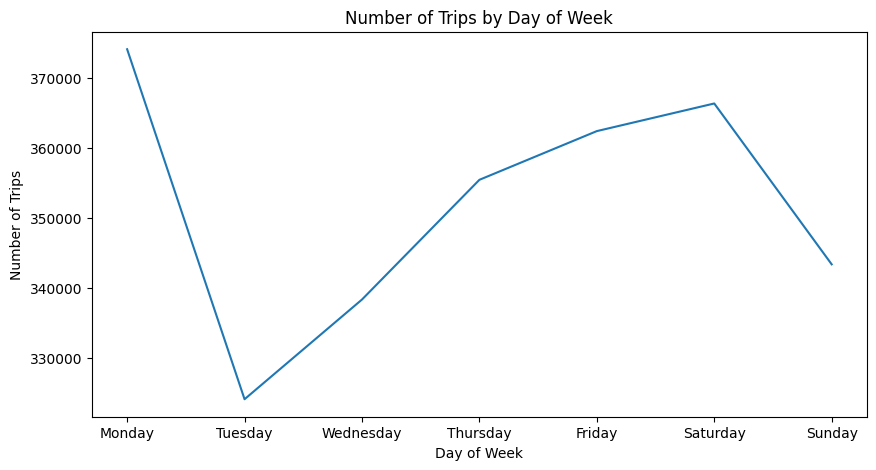

In [9]:
# Line plot: number of trips as a function of day of week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=df['pickup_dayofweek'].value_counts().reindex(order).index,
    y=df['pickup_dayofweek'].value_counts().reindex(order).values
)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()

# New Section